In [19]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
!unzip creditfraud.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense

In [23]:
dat=pd.read_csv('creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

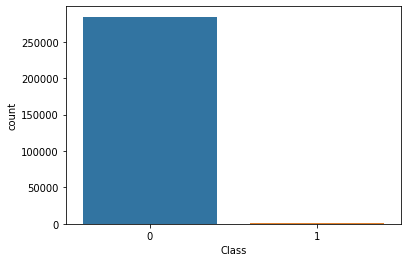

In [25]:
sns.countplot(x='Class',data=dat)

In [26]:
dat = dat.drop([ 'Time'], 1)
dat['Amount'] = StandardScaler().fit_transform(dat['Amount'].values.reshape(-1, 1))

C:\Users\adity\AppData\Local\Temp\ipykernel_10524\1485037447.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dat = dat.drop([ 'Time'], 1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)

C:\Users\adity\AppData\Local\Temp\ipykernel_10524\3396225669.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(dat.drop('Class',1) , dat['Class'], test_size=0.5, random_state=0)


In [28]:
y_test.value_counts()/y_test.count()

0    0.998294
1    0.001706
Name: Class, dtype: float64

In [29]:
y_train.value_counts()/y_train.count()

0    0.998251
1    0.001749
Name: Class, dtype: float64

In [30]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

In [31]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [32]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
autoencoder.fit(X_train_normal, X_train_normal, epochs = 100, batch_size=128,
validation_data=(X_train_normal,X_train_normal))

Epoch 1/100
1111/1111 [==============================] - 2s 2ms/step - loss: 0.9973 - val_loss: 0.8883
Epoch 2/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.8627 - val_loss: 0.8444
Epoch 3/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.8339 - val_loss: 0.8253
Epoch 4/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.8193 - val_loss: 0.8140
Epoch 5/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.8100 - val_loss: 0.8062
Epoch 6/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.8033 - val_loss: 0.8005
Epoch 7/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7983 - val_loss: 0.7962
Epoch 8/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.7945 - val_loss: 0.7927
Epoch 9/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.7915 - val_loss: 0.7901
Epoch 10/100
1111/1111 [==============================] - 2s 1ms/step - l

Epoch 80/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7697 - val_loss: 0.7697
Epoch 81/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7697 - val_loss: 0.7696
Epoch 82/100
1111/1111 [==============================] - 2s 2ms/step - loss: 0.7697 - val_loss: 0.7697
Epoch 83/100
1111/1111 [==============================] - 2s 2ms/step - loss: 0.7696 - val_loss: 0.7695
Epoch 84/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7696 - val_loss: 0.7694
Epoch 85/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7697 - val_loss: 0.7695
Epoch 86/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7695 - val_loss: 0.7694
Epoch 87/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7695 - val_loss: 0.7693
Epoch 88/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.7695 - val_loss: 0.7695
Epoch 89/100
1111/1111 [==============================] - 2s 2ms

In [34]:
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

4451/4451 [==============================] - 3s 614us/step


reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      142154.0   0.768960   3.436019  0.031550  0.228727   
1                         249.0  30.271693  42.960448  0.135221  4.527020   

                                              
                  50%        75%         max  
true_class                                    
0            0.395894   0.649056  317.789195  
1           11.328125  27.467501  278.643008

In [35]:
test_predictions=autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
y_pred=[(lambda er: 1 if er>=11.078922  else 0)(er) for er in mse]

4451/4451 [==============================] - 2s 545us/step


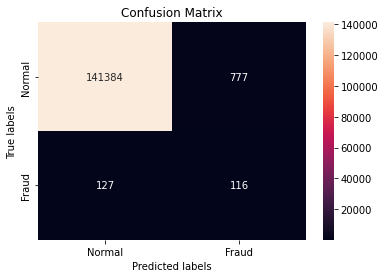

In [36]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))